<h1>Speculating on boundary conditions</h1>

This code is not tied into the main sapflow solver but serves as a sandbox to experiment with different B.Cs

<Figure size 640x480 with 0 Axes>

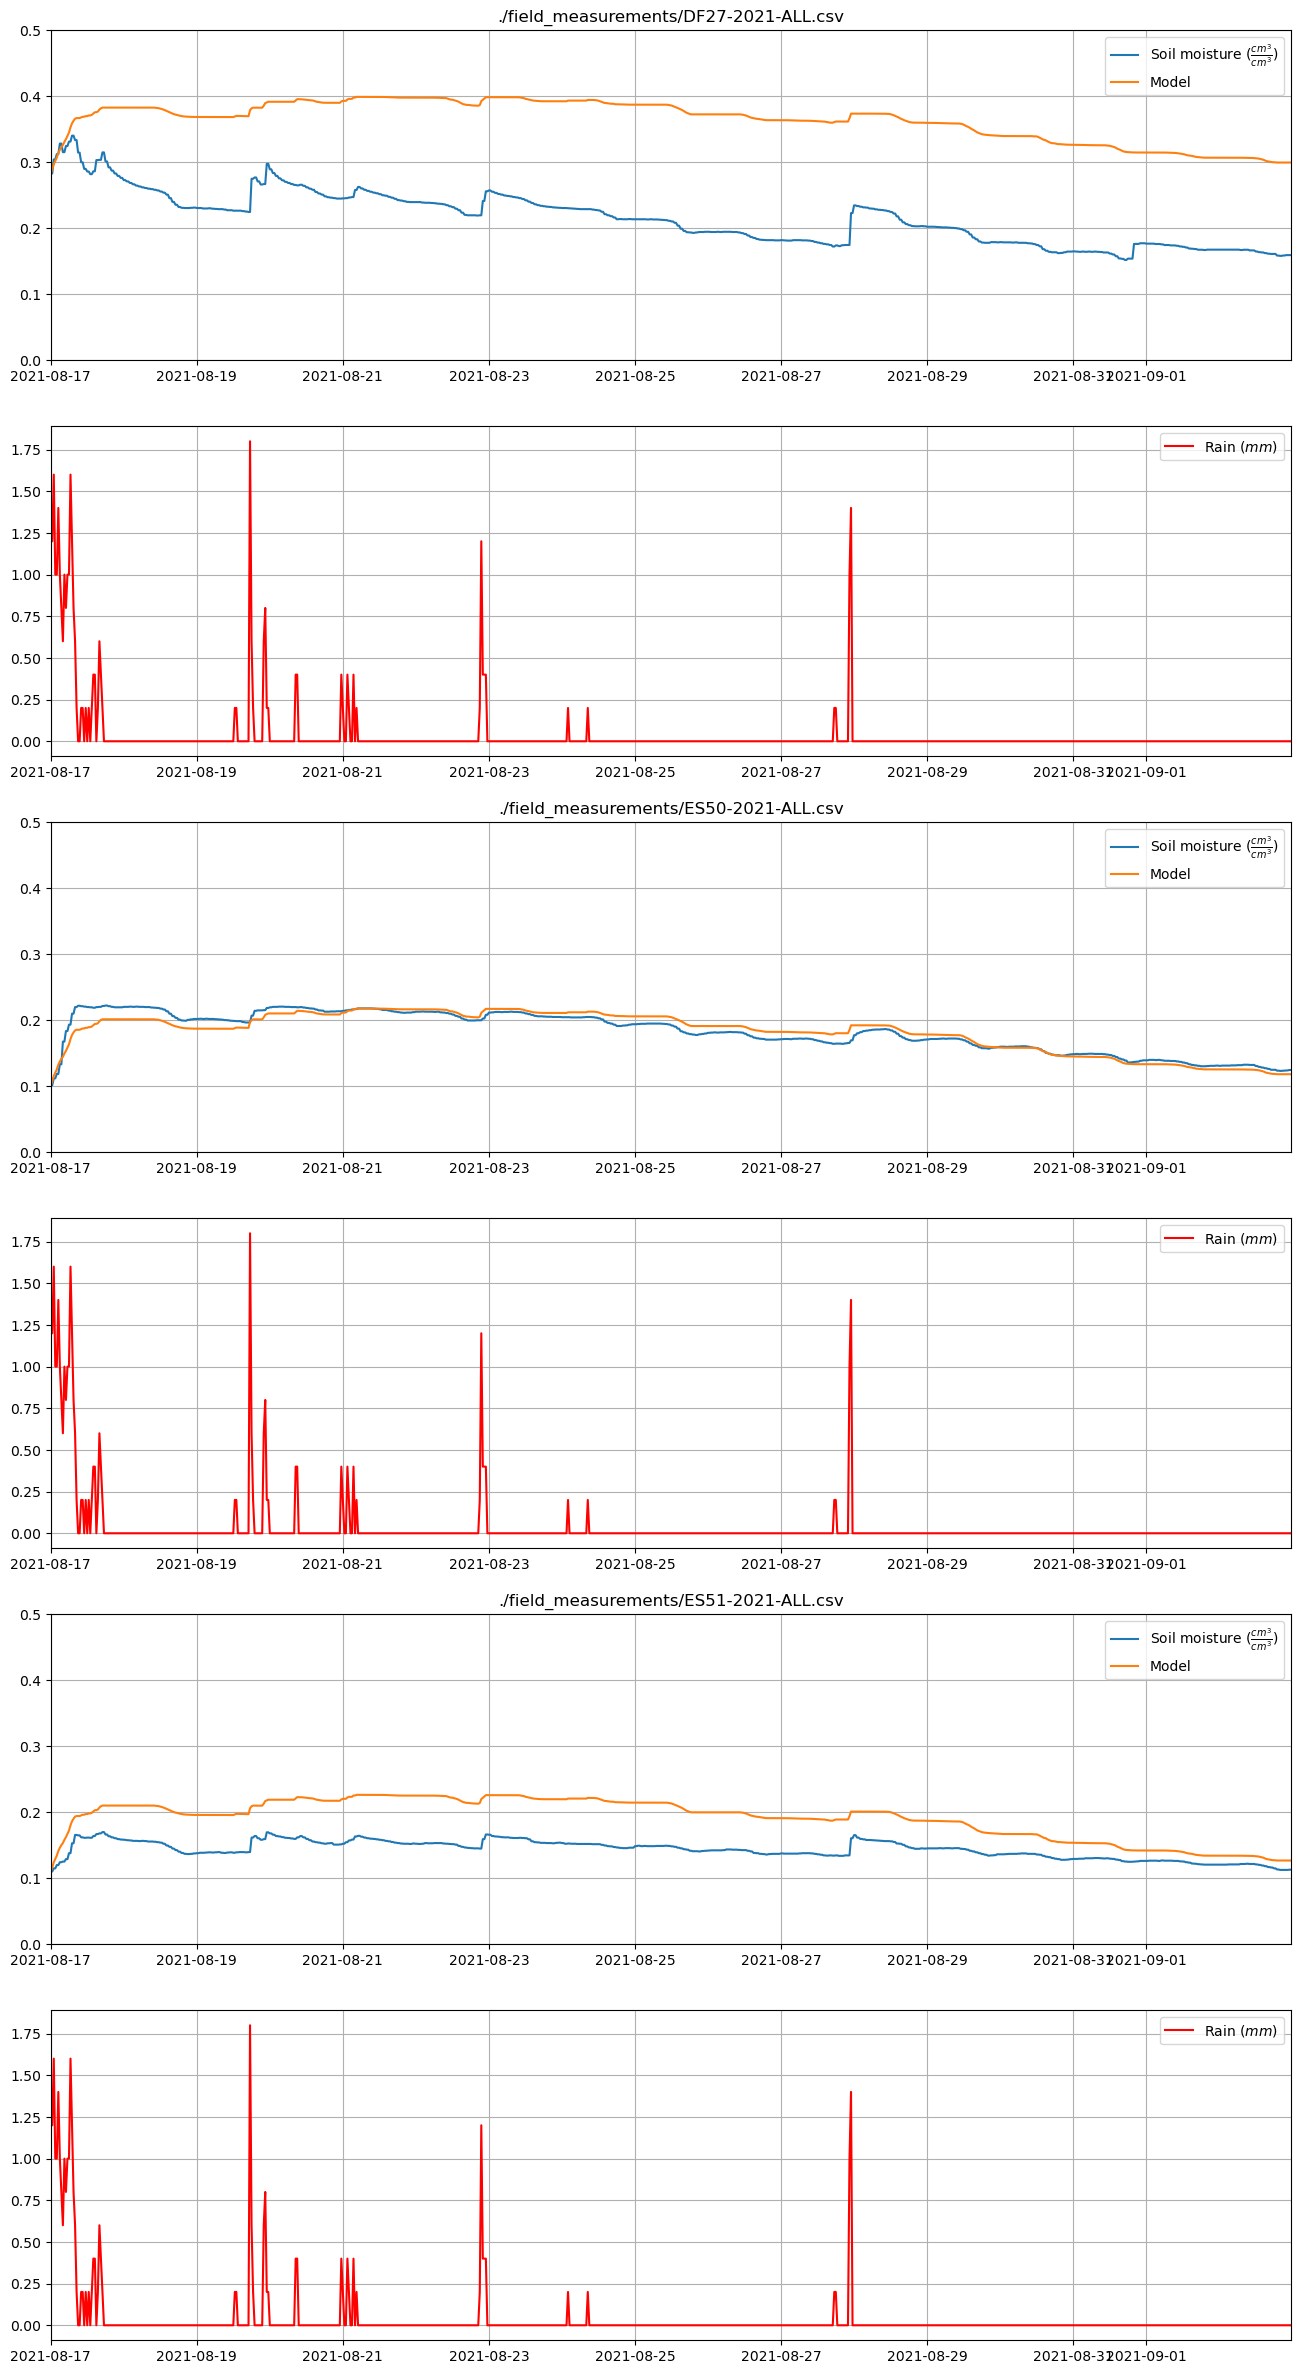

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
all_files =  [
    './field_measurements/DF27-2021-ALL.csv',
    './field_measurements/ES50-2021-ALL.csv',
    './field_measurements/ES51-2021-ALL.csv'
    ]
#['Date','Rain','PET','SV','SF','Soil_moisture','PSY']
plt.clf()
fig, axes = plt.subplots(len(all_files)*2,1, figsize=(16,10*len(all_files)))

LAI = 1.5
LAI_max = 6 

for j,filename in enumerate(all_files):
    data_all= pd.read_csv(filename, parse_dates=['Date'], index_col='Date')
    data = data_all.loc['2021-08-17 00:00:00':'2021-09-02 23:30:00']
    time_domain = data.index.values
    rain = data['Rain'].values
    pet= data['PET'].values #mm
    soil_moisture = data['Soil_moisture'].values
    
    # Top boundary coondition model
    # θ ic cm3/cm3, rain in mm, dt in s
    # a1, a2 have units that depend on the model choice. These are used as wildcards.
    def bc(θ, rain, dt, a1, a2, pet):
        return max(0, θ  - (pet*0.5*0.1)/10 + (rain*0.5*0.1)/10)# 0.5 half an hour, 0.1 percentage of water that evaporates and enters the soil, respectively, mm=dm3 water per m3 of soil => 1/10 m3w/m3s
        #return max(0, θ  - (dt)*a1*(pet*1000/1800) + ((dt)*a2*(rain*1000/1800))*(1/(θ)))#- 0.0001) #- 0.065*((rain*1000/1800)*θ)*(dt)

    model = np.zeros_like(rain)
    model[0] = soil_moisture[0]
    dt = 0.75 
    a1 = 0.25# 
    a2 = 0.10#

   

    for i,(r,p) in enumerate(zip(rain[1:],pet[1:])):
        model[i+1] = bc(model[i], r, dt, a1, a2,p)

        #print((pet[i]*0.5*0.1)*100)

    axes[j*2].set_title(filename)
    axes[j*2].plot(time_domain, soil_moisture, label='Soil moisture $(\\frac{cm^3}{cm^3})$')
    axes[j*2].plot(time_domain, model, label=f'Model')
    axes[j*2].set_xlim([time_domain.min(), time_domain.max()])
    axes[j*2].set_ylim([0, 0.5])
    axes[j*2].legend()
    axes[j*2].grid()
    axes[j*2+1].plot(time_domain, rain, label='Rain $(mm)$', color='red')
    axes[j*2+1].set_xlim([time_domain.min(), time_domain.max()])
    axes[j*2+1].legend()
    axes[j*2+1].grid()

In [106]:

β=0.001
Z=20
dz=1
print(range(Z))

po=[]
for i in range(Z):
    λ = β**(i*dz/Z)#1/sum([])
    po.append(λ)

po

range(0, 20)


[1.0,
 0.7079457843841379,
 0.5011872336272722,
 0.35481338923357547,
 0.251188643150958,
 0.1778279410038923,
 0.12589254117941673,
 0.08912509381337456,
 0.06309573444801932,
 0.04466835921509631,
 0.03162277660168379,
 0.02238721138568339,
 0.015848931924611138,
 0.011220184543019632,
 0.007943282347242817,
 0.005623413251903491,
 0.003981071705534972,
 0.0028183829312644544,
 0.0019952623149688794,
 0.0014125375446227548]